# Kernel
In machine learning, a **kernel is a function that computes the similarity** **between two points** in a **high-dimensional space**.

when we put our data in high dimensial space we can classify them more easyer than low dimensian.

It's a fundamental concept used in various algorithms, particularly in kernel methods such as Support Vector Machines (SVMs) and kernel regression.

The basic idea behind kernels is to implicitly map the input data into a higher-dimensional feature space where it's easier to separate or classify the data using linear techniques. **Kernels trick** allow algorithms to operate in this high-dimensional space without explicitly computing the transformed feature vectors, which can be computationally expensive or even infeasible for very high-dimensional data.


In summary, kernels provide a flexible and powerful way to capture complex relationships and patterns in data, enabling algorithms to effectively learn from high-dimensional feature spaces while avoiding the computational burden of explicitly working in those spaces.



```
# This is formatted as code
```

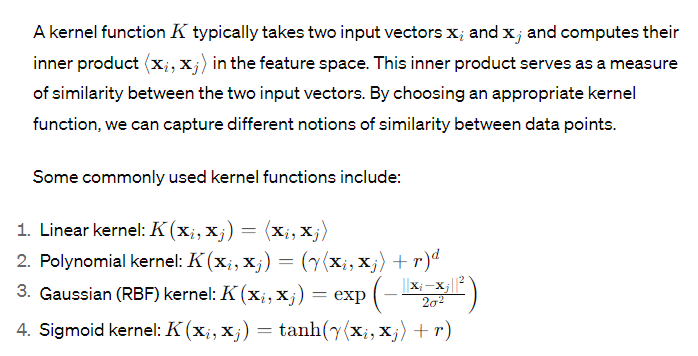

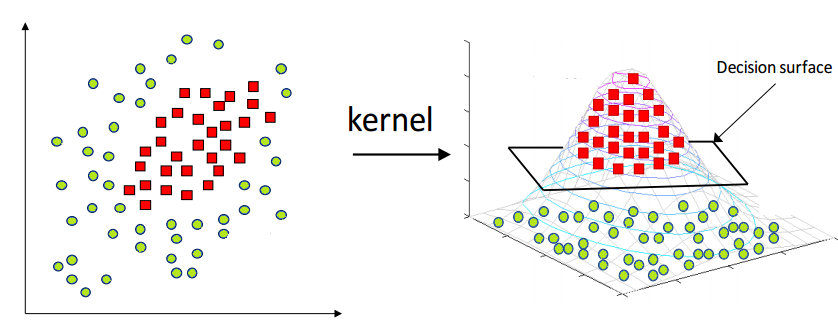

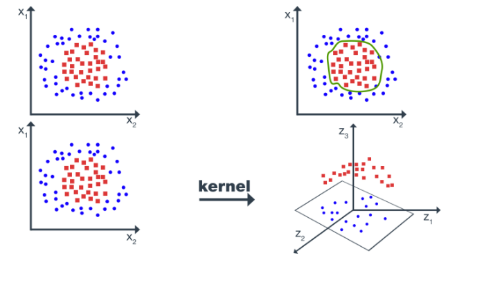

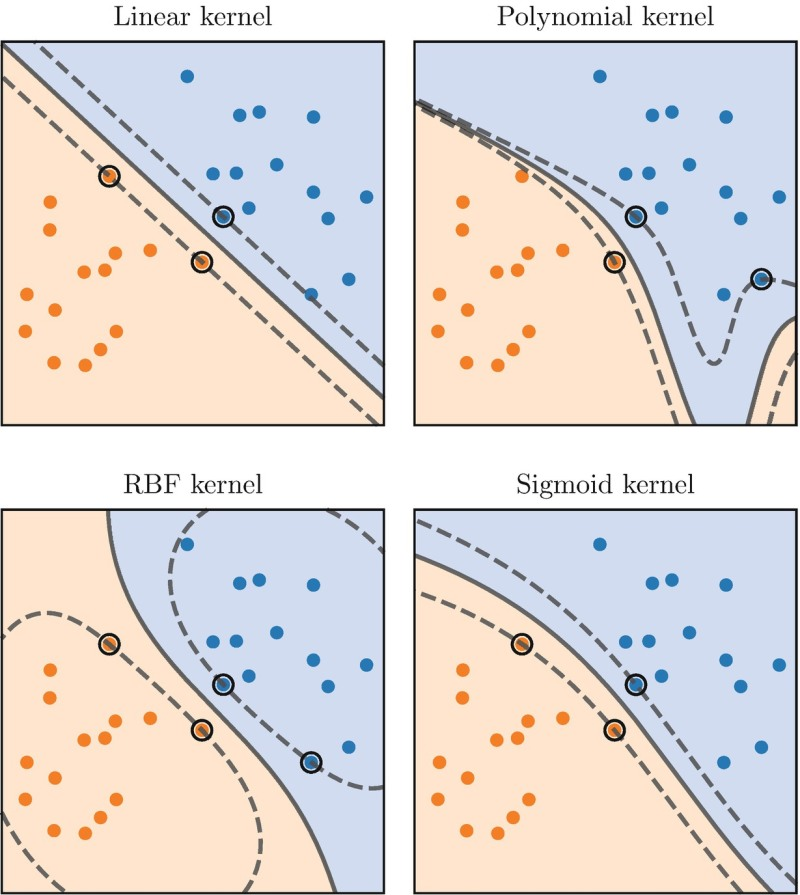

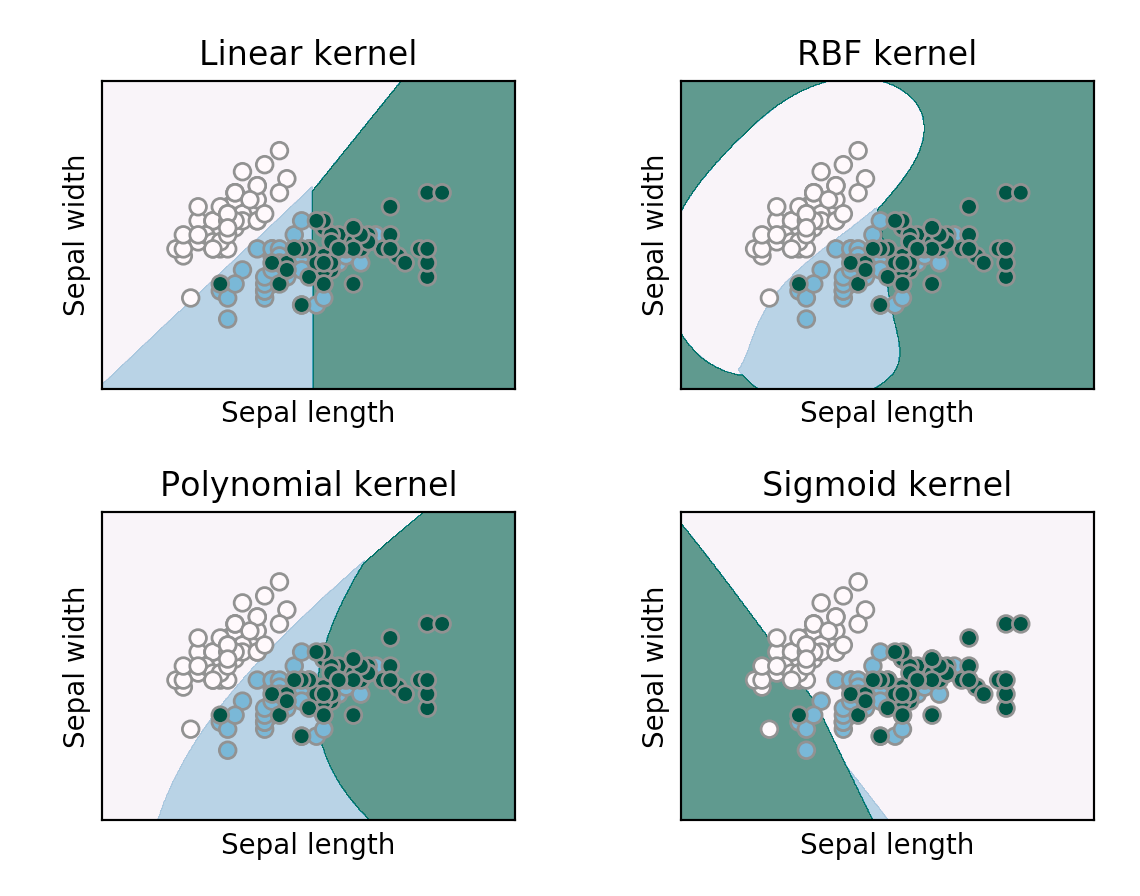

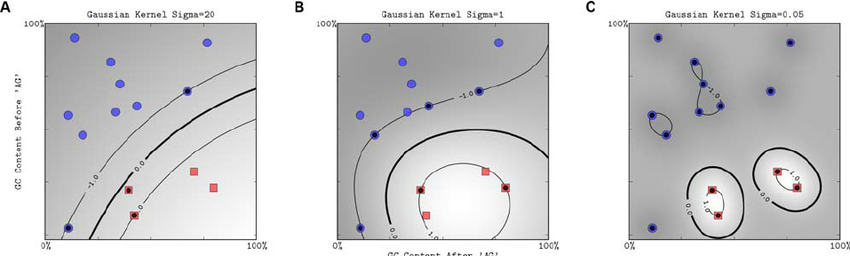

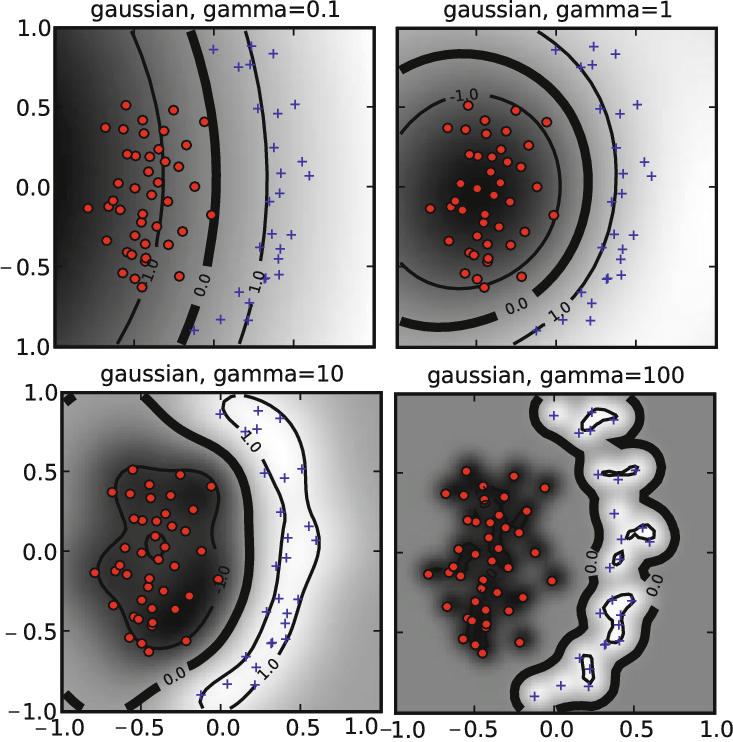

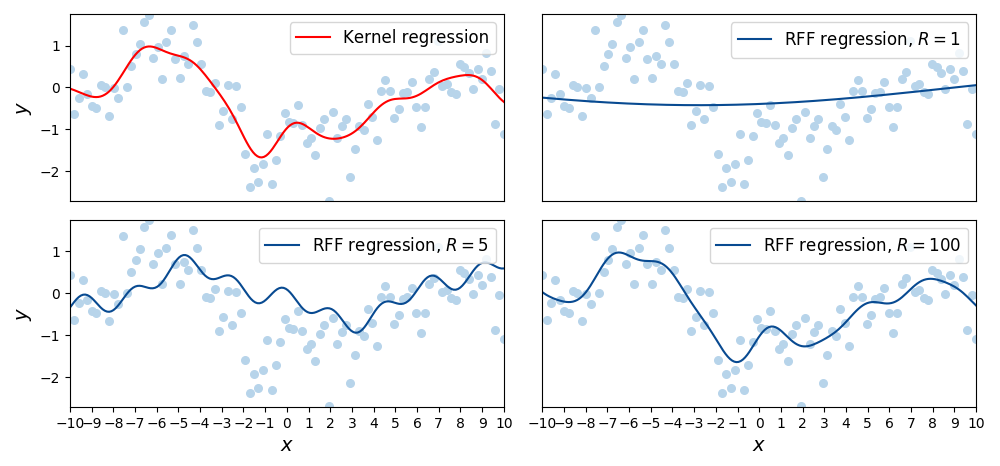

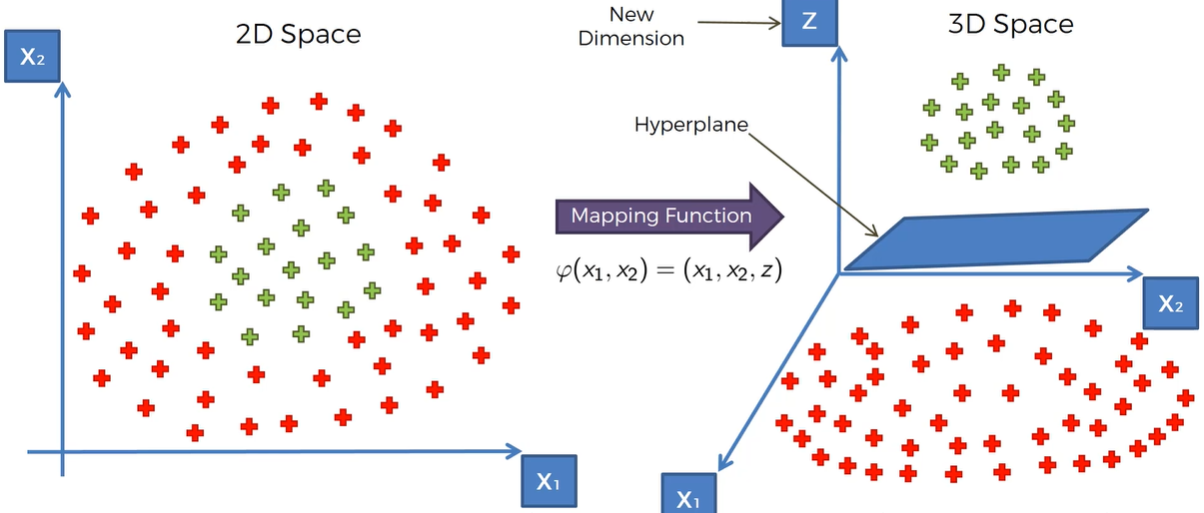

The kernel trick is a key concept in machine learning, particularly in the context of kernel methods such as Support Vector Machines (SVMs) and kernel regression.

It allows us to implicitly compute the **dot product of data points** in a high-dimensional feature space w**ithout actually transforming** the data into that space explicitly.

Here's a high-level explanation of the kernel trick:

Mapping to a higher-dimensional space: In many kernel methods, we aim to find a decision boundary or regression function that separates or fits the data in a high-dimensional feature space. However, computing the transformed feature vectors explicitly can be computationally expensive or even impossible for very high-dimensional or infinite-dimensional spaces.

Kernel function: Instead of explicitly mapping the data points into the high-dimensional space, we use a kernel function to compute the dot product (inner product) of the data points in the high-dimensional space. The kernel function computes the similarity or distance between two data points in the original input space.

Efficient computation: The key insight of the kernel trick is that we can compute the dot product of data points in the high-dimensional space without actually calculating the transformed feature vectors. This is achieved by directly evaluating the kernel function for pairs of input data points.

Avoiding explicit feature space: By using the kernel trick, we can work directly in the original input space while effectively leveraging the benefits of operating in a high-dimensional feature space. This allows us to apply kernel methods to complex problems with large or infinite-dimensional feature spaces without incurring the computational overhead of explicitly transforming the data.

The kernel trick enables kernel methods like SVMs and kernel regression to efficiently capture complex relationships and patterns in data while maintaining computational efficiency. It's a powerful technique that has widespread applications in various machine learning tasks.

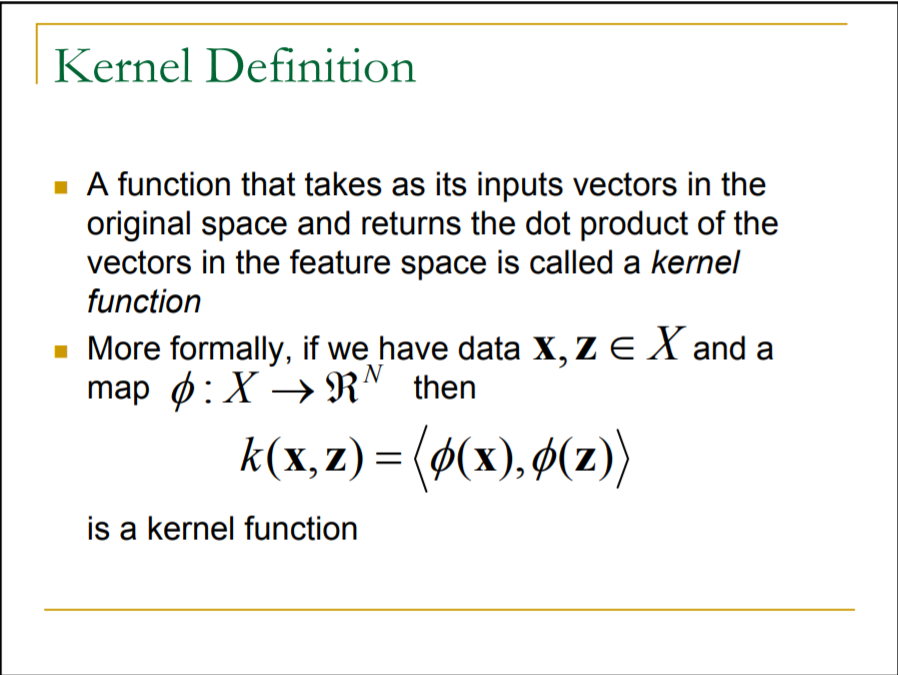

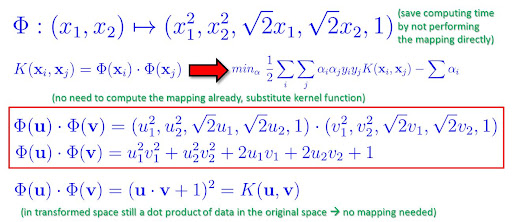

In [ ]:
import numpy as np
from sklearn.neighbors import KernelDensity

# Input and output data
X_train = np.array([[1], [2], [3], [4], [5]])
y_train = np.array([3, 4, 6, 7, 9])

# Query point
X_query = np.array([[3.5]])

# Define bandwidth for the kernel
bandwidth = 0.5

# Fit kernel density estimator
kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian').fit(X_train)

# Compute weights
weights = np.exp(kde.score_samples(X_query))

# Estimate output
y_estimate = np.sum(weights * y_train) / np.sum(weights)

print("Estimated output for x=3.5:", y_estimate)


Estimated output for x=3.5: 29.000000000000004


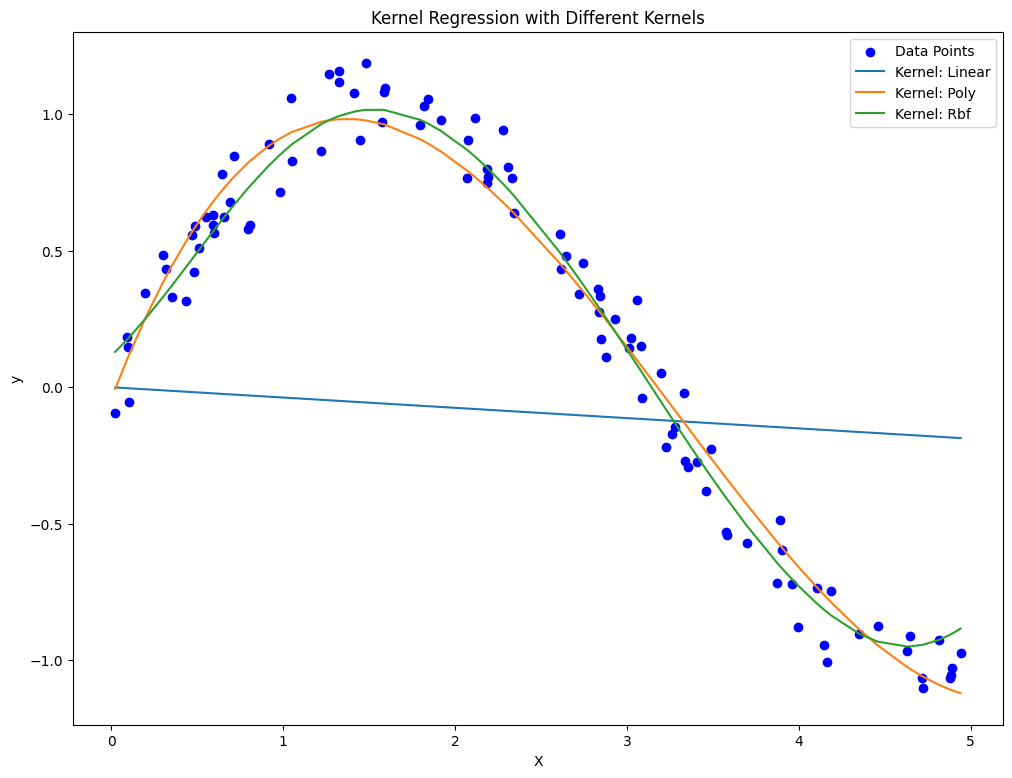

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge

# Generate synthetic dataset
np.random.seed(0)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, size=X.shape[0])

# Define kernel functions
kernels = ['linear', 'poly', 'rbf']

# Plot data points
plt.figure(figsize=(12, 9))
plt.scatter(X, y, color='blue', label='Data Points')

# Fit kernel regression and plot results for each kernel
for kernel in kernels:
    kr = KernelRidge(kernel=kernel)
    kr.fit(X, y)
    y_pred = kr.predict(X)
    plt.plot(X, y_pred, label=f'Kernel: {kernel.capitalize()}')

plt.title('Kernel Regression with Different Kernels')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


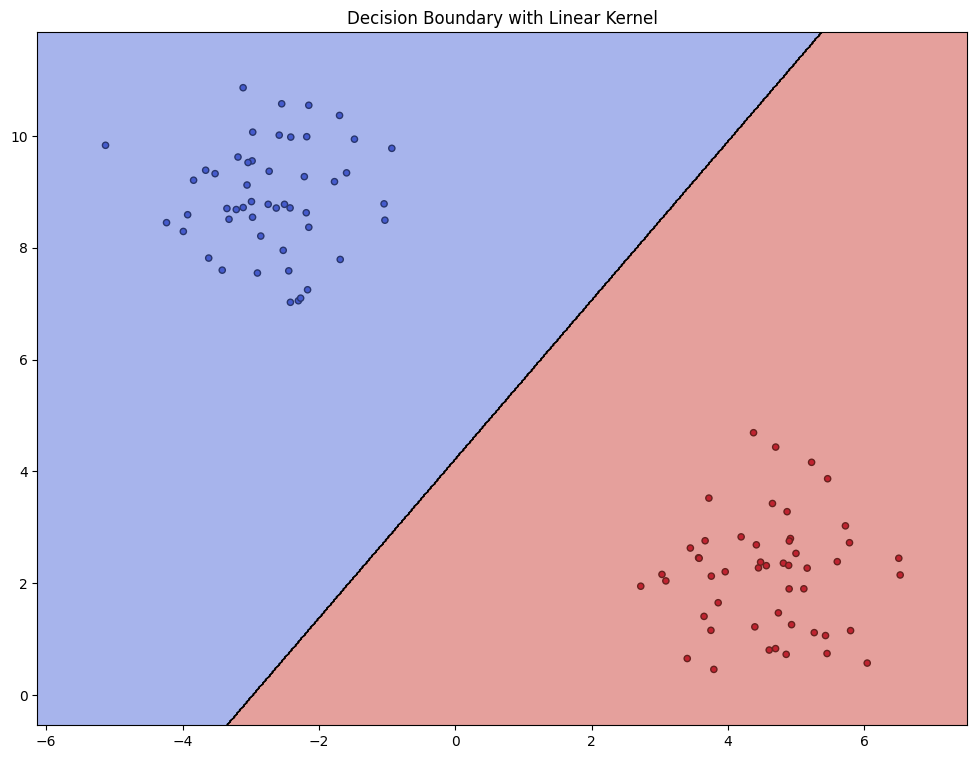

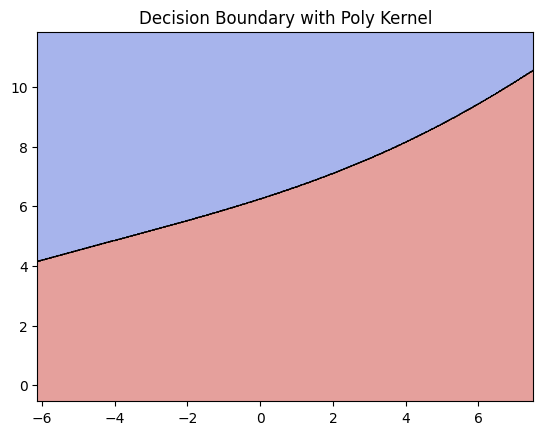

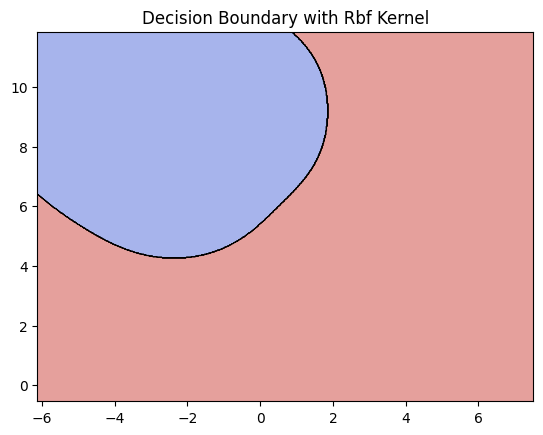

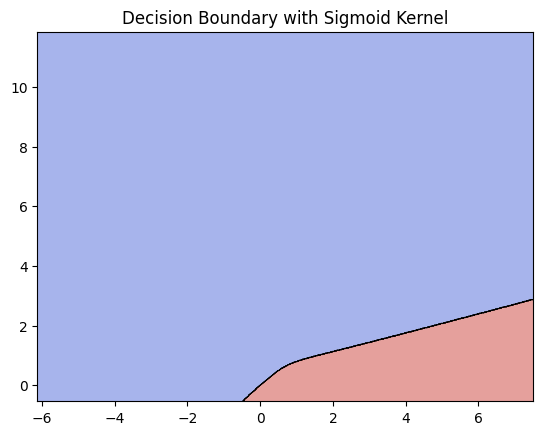

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Generate synthetic dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.0)

# Define meshgrid for visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Define different kernel functions
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Plot data points
plt.figure(figsize=(12, 9))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# Train and plot decision boundary for each kernel
for i, kernel in enumerate(kernels):
    clf = SVC(kernel=kernel, gamma='auto')
    clf.fit(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.5)
    plt.title(f'Decision Boundary with {kernel.capitalize()} Kernel')

    plt.show()
